In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-retail-ii-dataset/online_retail_II.xlsx


## **What is RFM Analysis?**
RFM **(Recency, Frequency, Monetary)** analysis is a method used to segment customers based on their purchasing behavior. It is widely used in customer relationship management (CRM) and marketing strategies.

**RFM Components**
1. **Recency**: How recently a customer made a purchase
2. **Frequency**: How often a customer makes purchases within a given period
3. **Monetary**: The total amount of money a customer has spent

**Calculating the RFM Score**
Each customer is assigned a score between 1 and 5 for **R, F, and M** (1 being the lowest, 5 being the highest). The **RFM score** is then created by combining these three values (e.g., 5-3-4). Higher scores indicate more valuable customers.

**Applications of RFM Analysis**
* **Customer segmentation** (e.g., VIP customers, new customers, dormant customers, etc.)
* **Targeted marketing campaigns**
* **Developing loyalty programs**
* **Preventing customer churn**

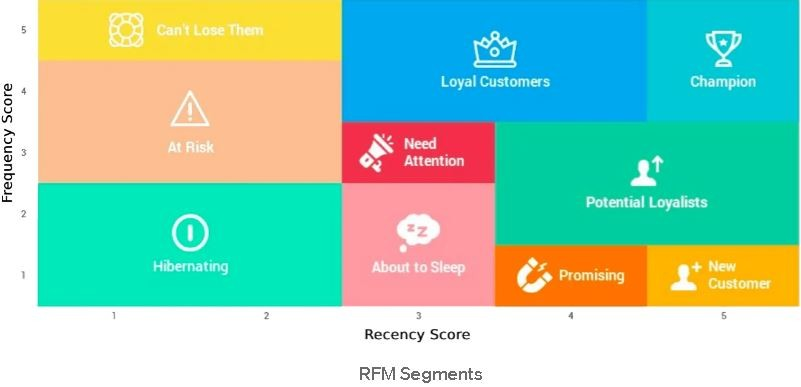
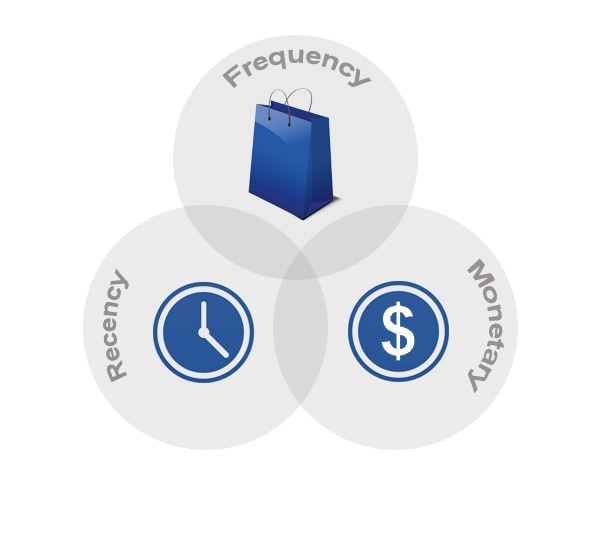
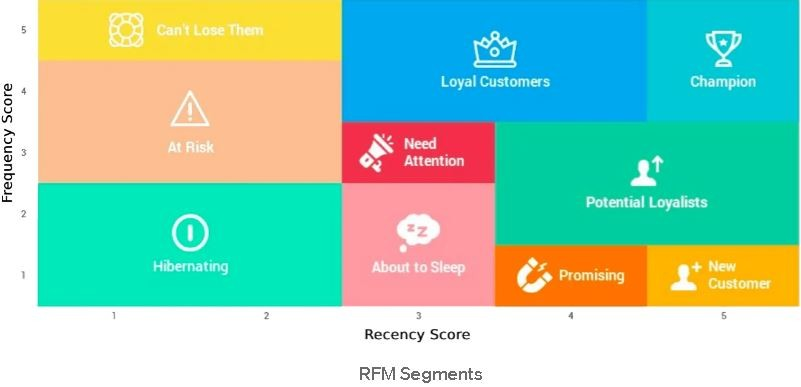
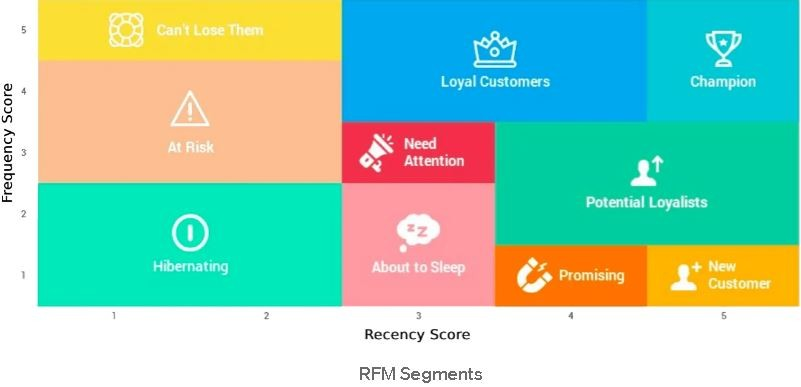

In [2]:
# Import necessary libraries
import pandas as pd  # For data analysis and manipulation
from scipy import stats  # For statistical operations
import datetime as dt  # For date and time operations
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn.preprocessing import MinMaxScaler  # For data scaling
from sklearn.cluster import KMeans  # For K-Means clustering algorithm
from scipy.cluster.hierarchy import dendrogram  # For drawing dendrograms in hierarchical clustering
from scipy.cluster.hierarchy import linkage  # For hierarchical clustering linkages
from yellowbrick.cluster import KElbowVisualizer  # For determining the optimal number of clusters in K-Means
from sklearn.cluster import AgglomerativeClustering  # For hierarchical clustering algorithm
from sklearn.preprocessing import StandardScaler  # For standardization
import seaborn as sns  # For data visualization
import numpy as np  # For numerical operations
import warnings  # For managing warnings

# Set Pandas options for better DataFrame display
pd.set_option('display.max_columns', 50)  # Show up to 50 columns in output
pd.set_option('display.max_rows', 50)  # Show up to 50 rows in output
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # Display float numbers with 2 decimal places
pd.set_option('display.width', 1000)  # Set display width to 1000 characters to prevent line breaks

# Ignore warning messages
warnings.filterwarnings("ignore")  # Suppress all warning messages

In [3]:
#Loading the dataset
df_ = pd.read_excel("/kaggle/input/online-retail-ii-dataset/online_retail_II.xlsx", sheet_name="Year 2009-2010")
df = df_.copy()

### DATASET BACKGROUND
The dataset Online Retail II contains online sales transactions of a UK-based retail company between 01/12/2009 and 09/12/2011. The company's product catalog includes souvenirs and most of its customers are wholesalers.

8 Variable, 541.909 Observation

* InvoiceNo : Invoice Number (If this code starts with C, it means that the transaction was canceled)
* StockCode : Product Code (Unique for each product)
* Description : Product Name
* Quantity : Number of Products (How many of the products in the invoices were sold)
* InvoiceDate : Invoice Date
* UnitPrice : Invoice Price (£)
* CustomerID : Unique Customer Number
* Country : Country Name

## Exploratory Data Analysis (EDA)

### What is EDA (Exploratory Data Analysis)?
EDA **(Exploratory Data Analysis)** is a data analysis method used to understand, summarize, and extract insights from a dataset. It is a crucial step in **machine learning** and **statistical analysis**.

* **Objectives of EDA**
* **Understanding the overall structure of the dataset** (size, variable types, etc.)
* **Detecting missing and outlier values**
* **Analyzing relationships between variables**
* **Examining data distributions and key statistics**
* **Gaining insights for proper data preprocessing and modeling**

**EDA Techniques**

* 🔹 Statistical Summary:
* Calculating key metrics such as mean, median, mode, and standard deviation
* Using the .describe() function in Pandas for quick insights
  
* 🔹 Visualization Methods:
* **Histograms**: Show the distribution of variables
* **Boxplots**: Help identify outliers
* **Scatter Plots**: Analyze relationships between variables
* **Correlation Heatmaps**: Display correlations between variables
  
* 🔹 Missing and Outlier Value Analysis:
* Identifying and handling missing data (imputation or removal)
* Detecting outliers using methods like **IQR (Interquartile Range)** or **Z-score**


In [4]:
#Print the first 5 rows of the dataframe.
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [5]:
df.shape # Shape

(525461, 8)

In [6]:
df.dtypes # Types

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [7]:
df.head(5) # Head

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [8]:
df.tail(5) # Tail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.00,United Kingdom


In [9]:
df.isnull().sum() # NA

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [10]:
print(df.describe([0.01, 0.1, 0.25, 0.50, 0.75, 0.9, 0.95, 0.99]))

       Quantity                    InvoiceDate     Price  Customer ID
count 525461.00                         525461 525461.00    417534.00
mean      10.34  2010-06-28 11:37:36.845017856      4.69     15360.65
min    -9600.00            2009-12-01 07:45:00 -53594.36     12346.00
1%        -3.00            2009-12-02 14:36:00      0.21     12435.00
10%        1.00            2010-01-12 09:48:00      0.65     13042.00
25%        1.00            2010-03-21 12:20:00      1.25     13983.00
50%        3.00            2010-07-06 09:51:00      2.10     15311.00
75%       10.00            2010-10-15 12:45:00      4.21     16799.00
90%       24.00            2010-11-19 13:06:00      7.95     17706.00
95%       30.00            2010-11-29 15:18:00     10.17     17913.00
99%      120.00            2010-12-08 10:40:00     19.95     18196.00
max    19152.00            2010-12-09 20:01:00  25111.09     18287.00
std      107.42                            NaN    146.13      1680.81


In [11]:
# Remove rows where the 'Invoice' column contains 'C' (usually indicating cancellations)
# This ensures that cancelled transactions are excluded from the dataset
df = df[~df["Invoice"].str.contains("C", na=False)]

# Keep only rows where 'Quantity' is greater than 0 (remove negative or zero quantity transactions)
# Negative quantities typically represent returned products, so they are filtered out
df = df[(df["Quantity"] > 0)]

# Drop rows with missing values to clean the dataset
# This helps in avoiding issues related to NaN (null) values in the analysis
df.dropna(inplace=True)

In [12]:
# Generate descriptive statistics for numerical columns
# Includes percentiles (1%, 10%, 25%, 50%, 75%, 90%, 95%, 99%) to understand data distribution
print(df.describe([0.01, 0.1, 0.25, 0.50, 0.75, 0.9, 0.95, 0.99]))

       Quantity                    InvoiceDate     Price  Customer ID
count 407695.00                         407695 407695.00    407695.00
mean      13.59  2010-07-01 10:10:10.782178048      3.29     15368.50
min        1.00            2009-12-01 07:45:00      0.00     12346.00
1%         1.00            2009-12-02 15:10:00      0.29     12435.00
10%        1.00            2010-01-19 11:01:00      0.65     13044.00
25%        2.00            2010-03-26 14:01:00      1.25     13997.00
50%        5.00            2010-07-09 15:46:00      1.95     15321.00
75%       12.00            2010-10-14 17:09:00      3.75     16812.00
90%       24.00            2010-11-18 10:37:00      6.75     17706.00
95%       36.00            2010-11-28 13:53:00      8.50     17913.00
99%      144.00            2010-12-07 14:31:00     14.95     18196.00
max    19152.00            2010-12-09 20:01:00  10953.50     18287.00
std       96.84                            NaN     34.76      1679.80


Quantiles are values that divide a dataset into specific proportions and are commonly used to understand the distribution of the data.

**Common Types:**
1. **Median (50th percentile)**: The middle value that divides the dataset into two equal parts.
2. **Quartiles**:

- *Q1 (1st Quartile)*: The value below which 25% of the data falls.
- *Q2 (2nd Quartile)*: The median (50th percentile).
- *Q3 (3rd Quartile)*: The value below which 75% of the data falls.
3. **Percentiles**: Divide the data into 100 equal parts, with each percentile representing a specific percentage.

**Applications**:
- **Data Distribution**: Helps understand how data is spread.
- **Boxplot**: A visualization used to summarize the data.
- **Machine Learning**: Used to split data and create threshold values.
- **Outlier Detection**: Identifies extreme values outside the expected range.

**Quantiles** are an important tool for summarizing, understanding, and analyzing the distribution of data.

In [13]:
df[df["Price"]==0]["StockCode"].unique()

array([22076, 48185, 'M', 22065, 22142, 85042, 21143, 79320, 22355, 21533,
       'TEST001', 21662, 22459, 22458, 22376, 21765, 20914, 22423, 22690,
       22472, 22202, '46000M', 22218, 22630, 22121, 21843, 22624, 22846,
       22845, 22841], dtype=object)

Purpose of the Code:

- This code is used to **identify products with a price of 0** in the dataset.
- It is useful for **data cleaning and validation**, as **products with a price of 0 may indicate missing, incorrect, or promotional/free items**.
- If these entries are **erroneous**, they may need to be corrected or removed before conducting further analysis.
- It is particularly helpful in **financial analysis and machine learning models**, where price-related anomalies should be addressed to ensure accurate predictions and insights.

In [14]:
df = df[df["StockCode"] != "M"]

In [15]:
invalid_codes = df[df["StockCode"].astype(str).str.contains(r"[a-zA-Z]{3,}")]["StockCode"].unique().tolist()

invalid_codes

['POST', 'BANK CHARGES', 'TEST001', 'TEST002', 'PADS', 'ADJUST', 'ADJUST2']

This code identifies invalid stock codes in the StockCode column that contain at least 3 letters and stores them in a list.

In [16]:
df[df["StockCode"].isin (invalid_codes)].groupby(["StockCode"]).agg({"Invoice":"nunique",
                                                                    "Quantity":"sum",
                                                                    "Price":"sum",
                                                                    "Customer ID":"nunique"})

,Invoice,Quantity,Price,Customer ID
StockCode,,,,
ADJUST,32,32,3538.52,25
ADJUST2,3,3,731.05,3
BANK CHARGES,20,20,300.00,12
PADS,14,14,0.01,12
POST,738,2212,19964.83,230
TEST001,11,60,40.50,4
TEST002,1,1,1.00,1


**Purpose of the Code**
* To analyze the sales performance of invalid stock codes.
* To determine the number of invoices issued for these stock codes.
* To calculate the total quantity of products sold.
* To find out the total revenue generated from these stock codes.
* To identify the number of unique customers who purchased these stock codes.

In [17]:
df = df[~df["StockCode"].isin(invalid_codes)].reset_index(drop=True)

In [18]:
def check_data(dataframe, head=5):
    print("######### SHAPE #########")
    print(dataframe.shape)
    print("######### INFO #########")
    print(dataframe.info())
    print("######### DESCRIBE #########")
    print(dataframe.describe([0.01, 0.1, 0.25, 0.50, 0.75, 0.9, 0.95, 0.99]))
    print("######### NA VALUES #########")
    print(dataframe.isnull().sum())
    print("######### FIRST {} ROWS #########".format (head))
    print(dataframe.shape)

In [19]:
check_data(df)

######### SHAPE #########
(406450, 8)
######### INFO #########
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406450 entries, 0 to 406449
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      406450 non-null  object        
 1   StockCode    406450 non-null  object        
 2   Description  406450 non-null  object        
 3   Quantity     406450 non-null  int64         
 4   InvoiceDate  406450 non-null  datetime64[ns]
 5   Price        406450 non-null  float64       
 6   Customer ID  406450 non-null  float64       
 7   Country      406450 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB
None
######### DESCRIBE #########
       Quantity                    InvoiceDate     Price  Customer ID
count 406450.00                         406450 406450.00    406450.00
mean      13.62  2010-07-01 10:28:27.142083840      3.01     15373.48
m

In [20]:
df["TotalPrice"] = df["Quantity"] * df["Price"]

**Purpose of the Code**
* To calculate the total amount in sales analysis.
* To determine invoice totals.
* To conduct profitability and revenue analysis.

In [21]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00


In [22]:
df.describe([0.01, 0.1, 0.25, 0.50, 0.75, 0.9, 0.95, 0.99])

,Quantity,InvoiceDate,Price,Customer ID,TotalPrice
count,406450.00,406450,406450.00,406450.00,406450.00
mean,13.62,2010-07-01 10:28:27.142083840,3.01,15373.48,21.36
min,1.00,2009-12-01 07:45:00,0.00,12346.00,0.00
1%,1.00,2009-12-02 15:04:00,0.29,12437.00,0.65
10%,1.00,2010-01-19 10:41:00,0.65,13050.00,2.10
25%,2.00,2010-03-26 14:01:00,1.25,14006.00,4.95
50%,5.00,2010-07-09 15:48:00,1.95,15325.00,11.85
75%,12.00,2010-10-14 17:09:00,3.75,16814.00,19.50
90%,24.00,2010-11-18 10:37:00,6.75,17706.00,35.40
95%,36.00,2010-11-28 13:51:00,8.50,17913.00,66.00


In [23]:
import datetime as dt  # Module for date operations

max_invoice_date = df["InvoiceDate"].max()  # Find the latest invoice date
today_date = max_invoice_date + dt.timedelta(days=2)  # Add 2 days

**Purpose of the Code**
* Determine an updated date based on the latest invoice date.
* Create a reference date for data analysis.
* Add a payment or validity period (e.g., calculate the delivery date).

In [24]:
today_date

Timestamp('2010-12-11 20:01:00')

In [25]:
max_invoice_date

Timestamp('2010-12-09 20:01:00')

In [26]:
rfm = df.groupby("Customer ID").agg({
    "InvoiceDate": lambda date: (today_date - date.max()).days,  # Recency (Last Purchase)
    "Invoice": "nunique",  # Frequency (Total Number of Invoices)
    "TotalPrice": "sum"  # Monetary (Total Spending)
})

**Purpose of the Code**
* Perform RFM analysis for customer segmentation.
* Understand customer shopping behavior.
* Identify loyal and high-value customers.
* Create customer groups for marketing campaigns.

In [27]:
rfm.head()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.00,166,2,169.36
12347.00,4,2,1323.32
12348.00,75,1,221.16
12349.00,44,2,2221.14
12351.00,12,1,300.93


In [28]:
rfm.columns = ["Recency", "Frequency", "Monetary"]
rfm = rfm[(rfm["Monetary"]) > 0 & (rfm["Frequency"] > 0)]

In [29]:
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.00,166,2,169.36
12347.00,4,2,1323.32
12348.00,75,1,221.16
12349.00,44,2,2221.14
12351.00,12,1,300.93


In [30]:
rfm.describe([0.01, 0.1, 0.25, 0.50, 0.75, 0.9, 0.95, 0.99])

,Recency,Frequency,Monetary
count,4286.00,4286.00,4286.00
mean,91.56,4.43,2025.18
std,96.35,7.95,8829.91
min,2.00,1.00,1.55
1%,2.00,1.00,40.76
10%,9.00,1.00,157.03
25%,19.00,1.00,307.66
50%,53.00,2.00,702.25
75%,136.75,5.00,1703.98
90%,255.00,9.00,3761.56


In [31]:
def select_country(dataframe, country):
    new_dataframe = dataframe.loc[datafrane["Country"] == country]
    return new_dataframe

This code defines a function that selects data for the specified country and returns a new DataFrame.

In [32]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    """
    This function calculates the lower and upper limits to detect outliers in a given column
    using the Interquartile Range (IQR) method.
    
    Parameters:
    dataframe (pd.DataFrame): The input DataFrame.
    col_name (str): The column name where outliers are to be detected.
    q1 (float): The first quartile (default is 0.05).
    q3 (float): The third quartile (default is 0.95).
    
    Returns:
    tuple: Lower and upper limits for outlier detection.
    """
    
    # Calculate the 1st quartile (Q1) and 3rd quartile (Q3)
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    
    # Calculate the Interquartile Range (IQR)
    interquantile_range = quartile3 - quartile1
    
    # Define the upper and lower limits for outliers
    up_limit = quartile3 + 1.5 * interquantile_range  # Upper limit for outliers
    low_limit = quartile1 - 1.5 * interquantile_range  # Lower limit for outliers
    
    # Return the lower and upper limits
    return low_limit, up_limit


In [33]:
def check_outlier(dataframe, col_name, q1=0.05, q3=0.95):
    # Calculate outlier limits
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    
    # Check for outliers
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True  # Return True if there are outliers
    else:
        return False  # Return False if there are no outliers


In [34]:
def replace_with_thresholds(dataframe, variable):
    # Calculate outlier thresholds
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    
    # Replace outliers with the lower limit
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    
    # Replace outliers with the upper limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


In [35]:
for col in rfm.columns:
    print(col, check_outlier(rfm, col))

Recency False
Frequency True
Monetary True


In [36]:
for col in rfm.columns:
    replace_with_thresholds (rfm, col)

In [37]:
rfm.describe()

,Recency,Frequency,Monetary
count,4286.00,4286.00,4286.00
mean,91.56,4.11,1588.58
std,96.35,4.89,2523.16
min,2.00,1.00,1.55
25%,19.00,1.00,307.66
50%,53.00,2.00,702.25
75%,136.75,5.00,1703.98
max,375.00,31.00,15243.20


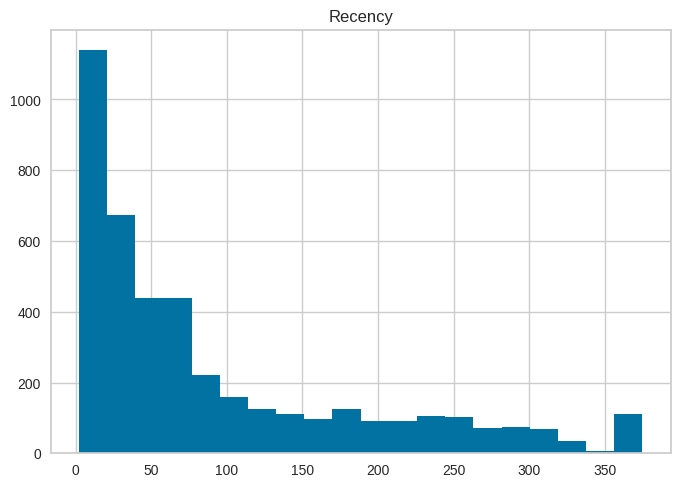

In [38]:
# Create a histogram to visualize the distribution of "Recency" (days since last purchase)
rfm["Recency"].hist(bins=20)  # Create histogram with 20 bins

# Set the title of the histogram for better understanding
plt.title("Recency")

# Display the histogram
plt.show()

In [39]:
# Log Transformation for "Recency" and "Frequency" columns
for col in ["Recency", "Frequency"]:
    # Apply log transformation with np.log1p to handle zero or negative values
    rfm[f"LOG_{col}"] = np.log1p(rfm[col])

# Display the first few rows of the modified dataframe
rfm.head()

,Recency,Frequency,Monetary,LOG_Recency,LOG_Frequency
Customer ID,,,,,
12346.00,166.00,2,169.36,5.12,1.10
12347.00,4.00,2,1323.32,1.61,1.10
12348.00,75.00,1,221.16,4.33,0.69
12349.00,44.00,2,2221.14,3.81,1.10
12351.00,12.00,1,300.93,2.56,0.69


In [40]:
# Initialize the StandardScaler object
sc = StandardScaler()

# Fit the scaler on the "LOG_Recency" and "LOG_Frequency" columns to learn the mean and std
sc.fit(rfm[["LOG_Recency", "LOG_Frequency"]])

# Apply the scaling transformation to the selected columns
scaled_rf = sc.transform(rfm[["LOG_Recency", "LOG_Frequency"]])

**Standard Scaler** is a data preprocessing technique used to **standardize** the features of a dataset, ensuring that each feature has a **mean of 0** and a **standard deviation of 1**. This is achieved using the following formula:

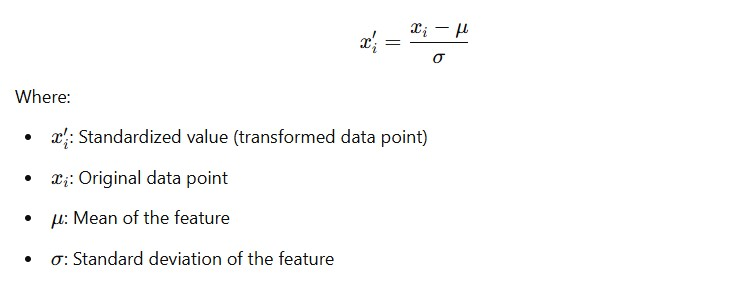

**Steps**:
1. **Calculate the Mean** (𝜇) of each feature.
2. **Calculate the Standard Deviation** (𝜎) of each feature.
3. **Transform the Data**: Subtract the mean from each data point and divide by the standard deviation. This results in a dataset where the features have a mean of 0 and a standard deviation of 1.

**Key Features and Benefits**:
* **Improved Model Performance**: Standardization is crucial for algorithms that use gradient descent or are distance-based (e.g., KNN, SVM).
* **Eliminates Scale Differences**: It ensures features are on a similar scale, making the model training process more stable and efficient.
* **Faster Convergence**: Models converge faster as standardized data allows for better optimization during training.

**When to Use Standard Scaler**:
* It is especially useful when working with **distance-based algorithms** (e.g., KNN, K-means) and **gradient descent-based algorithms** (e.g., Logistic Regression, Neural Networks).
* It is beneficial when the features have **different scales** or when there are **outliers** in the data.

In [41]:
scaled_df = pd.DataFrame (index=rfm.index, columns=["LOG_Recency", "LOG_Frequency"], data=scaled_rf)
scaled_df

,LOG_Recency,LOG_Frequency
Customer ID,,
12346.00,0.99,-0.40
12347.00,-1.85,-0.40
12348.00,0.35,-1.00
12349.00,-0.07,-0.40
12351.00,-1.08,-1.00
...,...,...
18283.00,-0.73,0.87
18284.00,0.27,-1.00
18285.00,1.45,-1.00


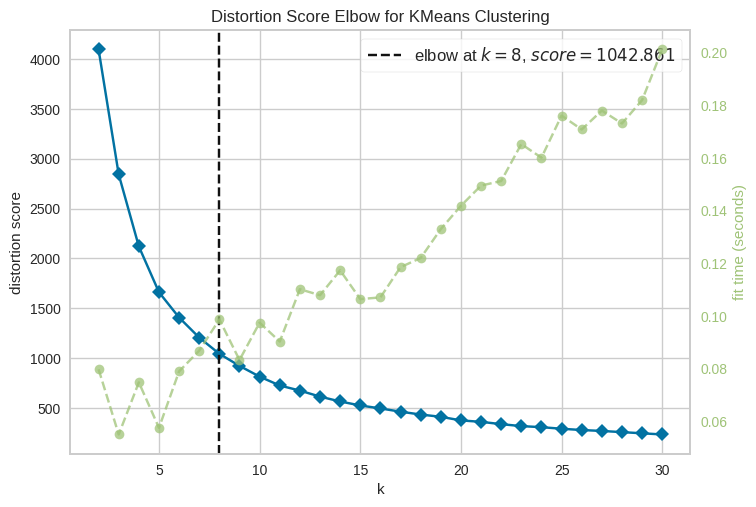

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
# Initialize KMeans model
kmeans = KMeans()

# Find optimal k (1-30) using Elbow Method
elbow = KElbowVisualizer(kmeans, k=30)

# Fit and display the elbow plot
elbow.fit(scaled_df)
elbow.show()

### **What is K-Means?**
**K-Means** is an **unsupervised learning** algorithm used for **clustering**. It partitions data into **K** clusters, grouping similar data points together.

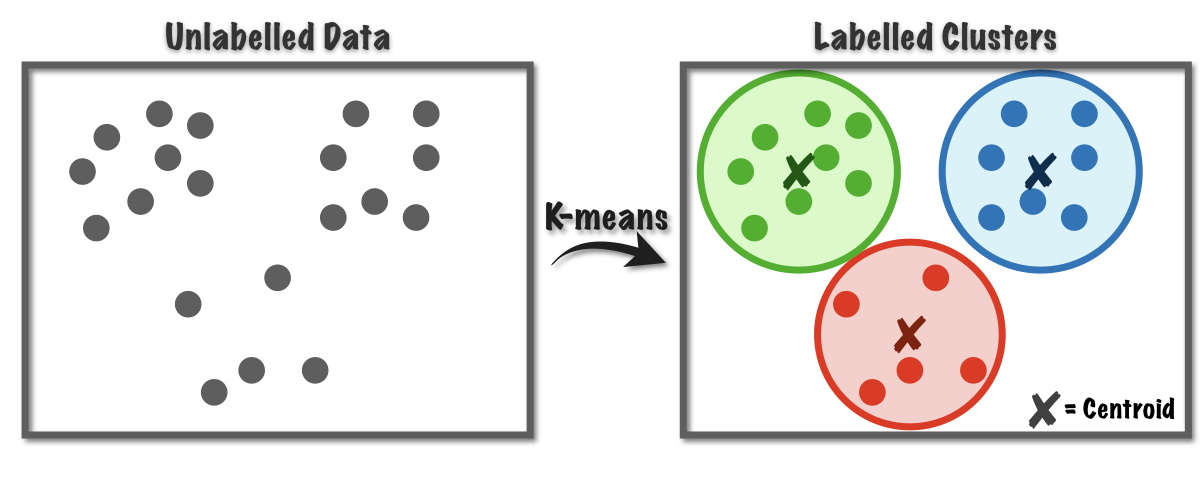

**How Does It Work?**
1. **Select K cluster centroids randomly**.
2. **Assign each data point to the nearest cluster**.
3. **Recalculate the centroids based on the assigned points**.
4. **Repeat steps 2 and 3** until the centroids do not change.

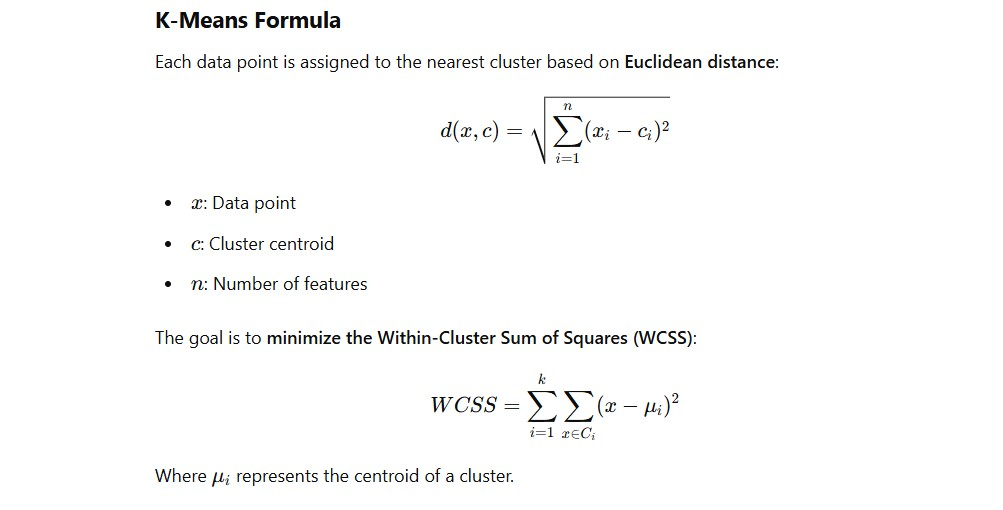

**Advantages of K-Means**
* ✅ **Simple and fast**: Works efficiently on large datasets.
* ✅ **Scalable**: Can handle large-scale data.
* ✅ **Effective for high-dimensional data**.

**Disadvantages of K-Means**
* ❌ **Choosing K is challenging**: Usually determined using the **Elbow Method**.
* ❌ **Sensitive to initialization and outliers**.
* ❌ **Assumes clusters are spherical**: May not perform well on complex distributions.

**How to Determine K? (Elbow Method)**

By calculating the error (inertia) for different values of **K**, the **elbow point** is found, representing the optimal number of clusters.

**When to Use K-Means**?
* **Customer segmentation** (e.g., grouping shoppers by behavior)
* **Anomaly detection**
* **Image compression and segmentation**
* **Document clustering**

K-Means is a fast and efficient clustering algorithm, widely used in various domains.

In [43]:
k_ = elbow.elbow_value_
print(k_)

8


In [44]:
# Apply KMeans clustering with k_ clusters on the scaled data
k_means = KMeans(n_clusters=k_, random_state=99).fit(scaled_df)

# Get the cluster labels (which cluster each data point belongs to)
segments = k_means.labels_

In [45]:
segments

array([1, 0, 2, ..., 1, 2, 7], dtype=int32)

In [46]:
rfm["KMeans_Segments"] = segments
rfm.head()

,Recency,Frequency,Monetary,LOG_Recency,LOG_Frequency,KMeans_Segments
Customer ID,,,,,,
12346.00,166.00,2,169.36,5.12,1.10,1
12347.00,4.00,2,1323.32,1.61,1.10,0
12348.00,75.00,1,221.16,4.33,0.69,2
12349.00,44.00,2,2221.14,3.81,1.10,2
12351.00,12.00,1,300.93,2.56,0.69,6


In [47]:
rfm.groupby("KMeans_Segments").agg({"Recency":["mean", "median", "count"],
                                    "Frequency":["mean","median","count"],
                                    "Monetary":["mean","median","count"]})

Recency              Frequency              Monetary              
                   mean median count      mean median count     mean  median count
KMeans_Segments                                                                   
0                  6.39   5.00   352      5.23   5.00   352  1896.92 1382.80   352
1                241.97 234.00   939      1.24   1.00   939   403.23  266.50   939
2                 69.27  66.00   790      1.43   1.00   790   533.50  378.46   790
3                 32.65  25.00   384     10.40   9.00   384  4145.36 3148.78   384
4                  6.02   5.00   214     19.23  17.00   214  7843.35 6008.61   214
5                118.37  96.00   578      4.17   4.00   578  1667.55 1234.72   578
6                 20.11  20.00   474      1.47   1.00   474   506.44  350.01   474
7                 29.66  29.00   555      4.08   4.00   555  1561.51 1189.38   555

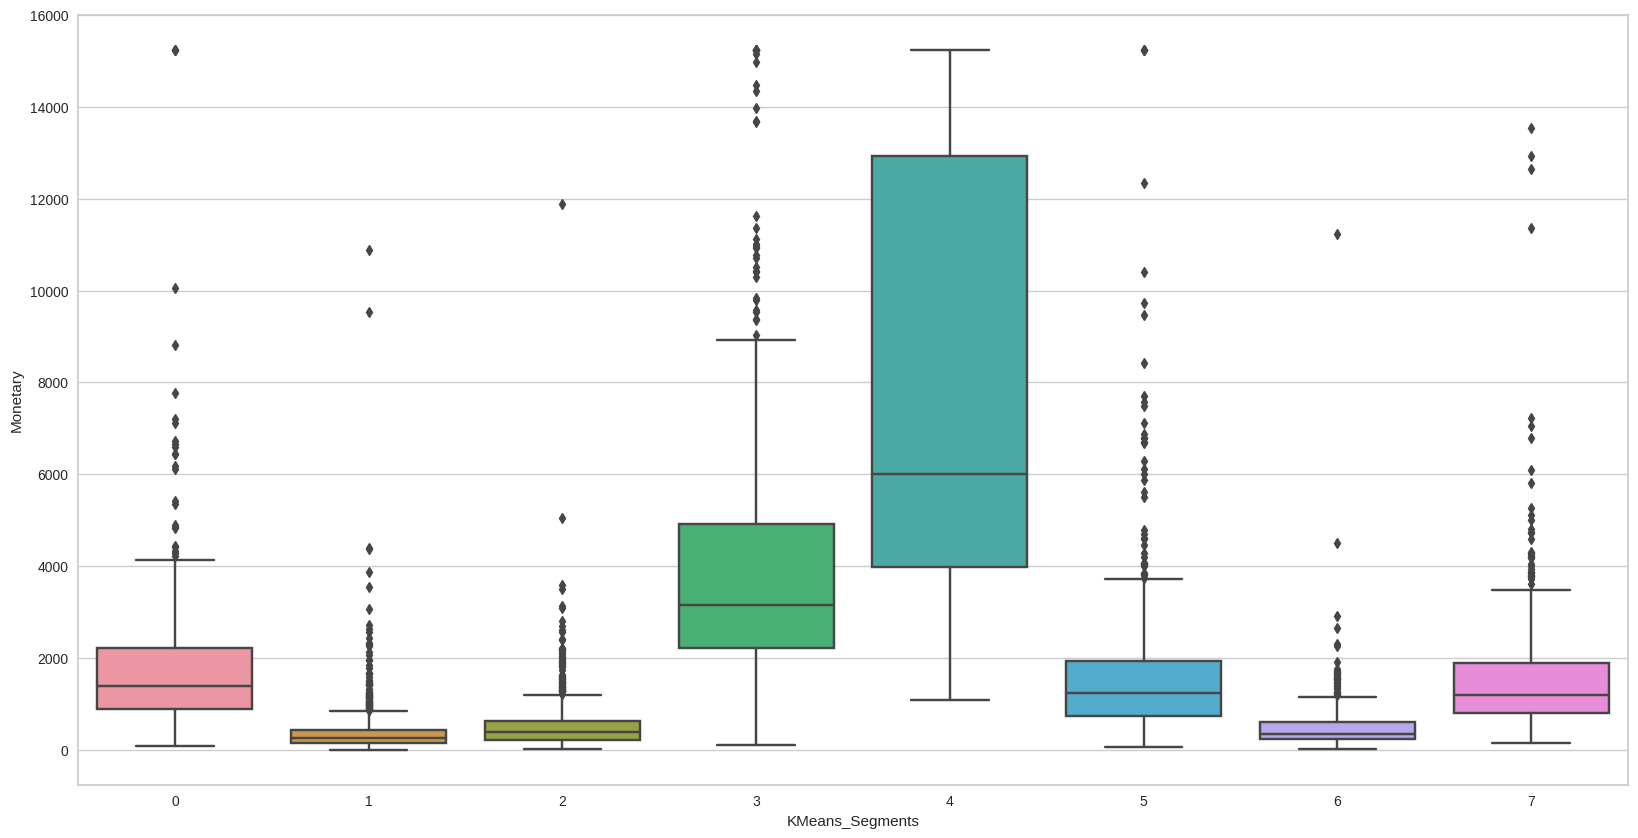

In [48]:
plt.figure(figsize=(20, 10))
sns.boxplot(x="KMeans_Segments", y="Monetary", data=rfm)
plt.show()

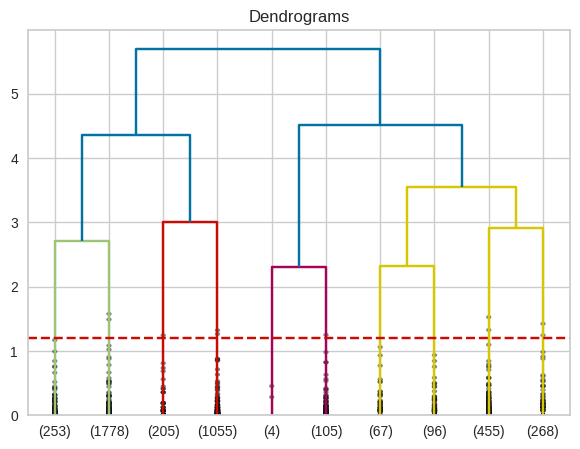

In [49]:
# Hierarchical Clustering

hc_complete = linkage(scaled_df, "complete")
plt.figure(figsize=(7, 5))
plt.title("Dendrograms")
dend = dendrogram(hc_complete,
                 truncate_mode="lastp",
                 p=10,
                 show_contracted=True,
                 leaf_font_size=10)
plt.axhline(y=1.2, color='r', linestyle="--")
plt.show()

### **What is Hierarchical Clustering**?
**Hierarchical Clustering** is an **unsupervised learning** technique used to group data points into clusters based on their similarities. Unlike **K-Means**, it **does not require a predefined number of clusters (K)** and instead builds a **hierarchical tree structure** of the data.

**How Does It Work**?
Hierarchical clustering can be performed using two main approaches:

1. **Bottom-Up (Agglomerative Clustering)**

* **Each data point starts as its own cluster.**
* The closest two clusters are merged.
* This process continues until all data points form a single cluster.
 
2. **Top-Down (Divisive Clustering)**

* **All data points start in a single cluster.**
* The cluster is split into smaller sub-clusters based on differences.
* This continues until each data point is its own cluster.

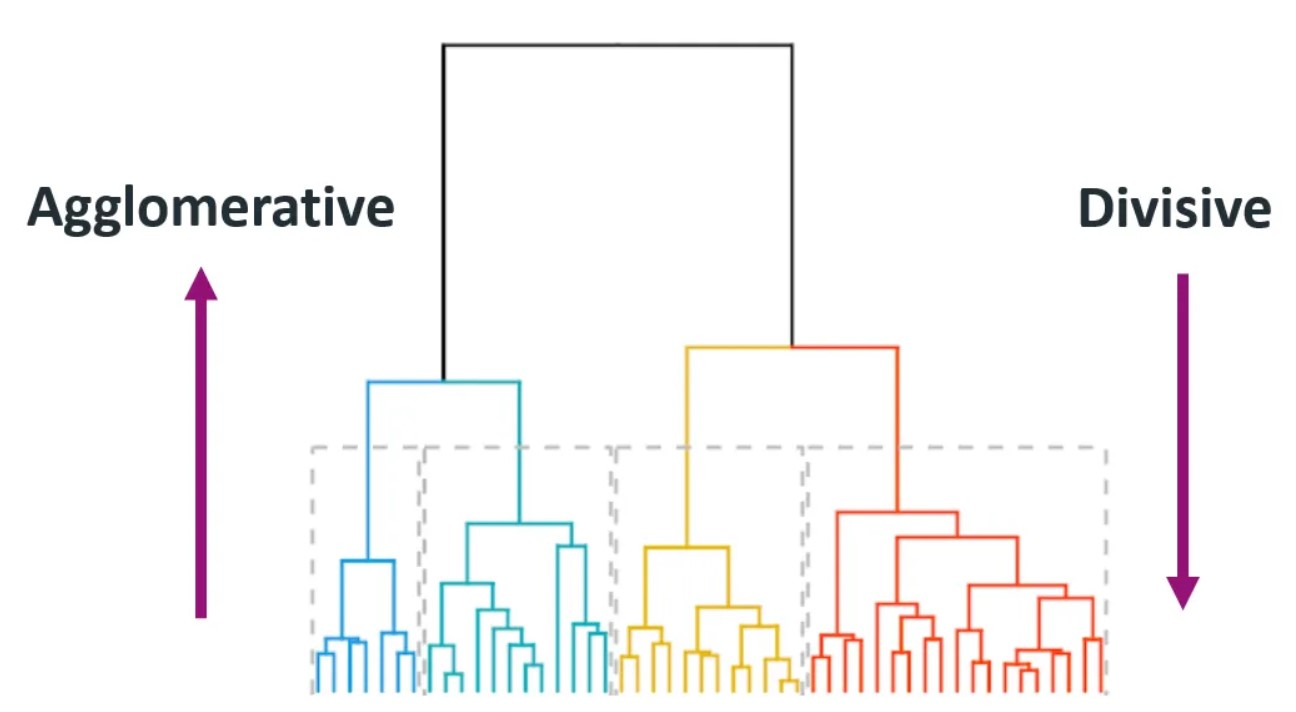

**Linkage Methods**
To determine which clusters should merge, different **distance (linkage) metrics** are used:

* **Single Linkage**: Merges clusters based on the shortest distance between two points.
* **Complete Linkage**: Uses the longest distance between two points in different clusters.
* **Average Linkage**: Computes the average distance between all points in two clusters.
* **Centroid Linkage**: Uses the distance between cluster centroids.

**Advantages of Hierarchical Clustering**
* ✅ **No need to predefine the number of clusters (K).**
* ✅ **Provides a visual representation with dendrograms.**
* ✅ **Works well for complex data structures.**

**Disadvantages of Hierarchical Clustering**
* ❌ **Slow for large datasets** (especially Agglomerative Clustering).
* ❌ **Irreversible** (once clusters merge, they cannot be split again).
* ❌ **Sensitive to distance metrics** (different linkages may produce different results).

**What is a Dendrogram?**

A **dendrogram** is a tree-like diagram that shows how data points are grouped at each step of hierarchical clustering. To determine the final clusters, the **dendrogram is cut at a specific height**, separating the data into meaningful groups.

**When to Use Hierarchical Clustering?**
* **Genetic analysis** (e.g., DNA sequence similarity).
* **Document clustering and text analysis.**
* **Customer segmentation.**
* **Social network analysis**.
Hierarchical clustering is a powerful tool, especially when **the number of clusters is unknown** and a **detailed data structure analysis** is required.

In [50]:
hc = AgglomerativeClustering(n_clusters=6)
segments = hc.fit_predict(scaled_df)
rfm["Hierarchi_Segments"] = segments

In [51]:
rfm.groupby("Hierarchi_Segments").agg({"Recency":["mean","median","count"],
                                       "Frequency":["mean","median","count"],
                                       "Monetary":["mean","median","count"]})

Recency              Frequency              Monetary              
                      mean median count      mean median count     mean  median count
Hierarchi_Segments                                                                   
0                    22.54  17.00   915      8.22   7.00   915  3183.45 2342.57   915
1                    71.59  60.00  1091      3.42   3.00  1091  1354.29  940.86  1091
2                   227.53 220.00  1131      1.43   1.00  1131   474.46  301.65  1131
3                    13.24  13.00   462      2.05   2.00   462   654.60  498.73   462
4                    55.18  53.50   534      1.00   1.00   534   413.07  281.32   534
5                     5.11   5.00   153     21.38  19.00   153  8880.06 7637.56   153

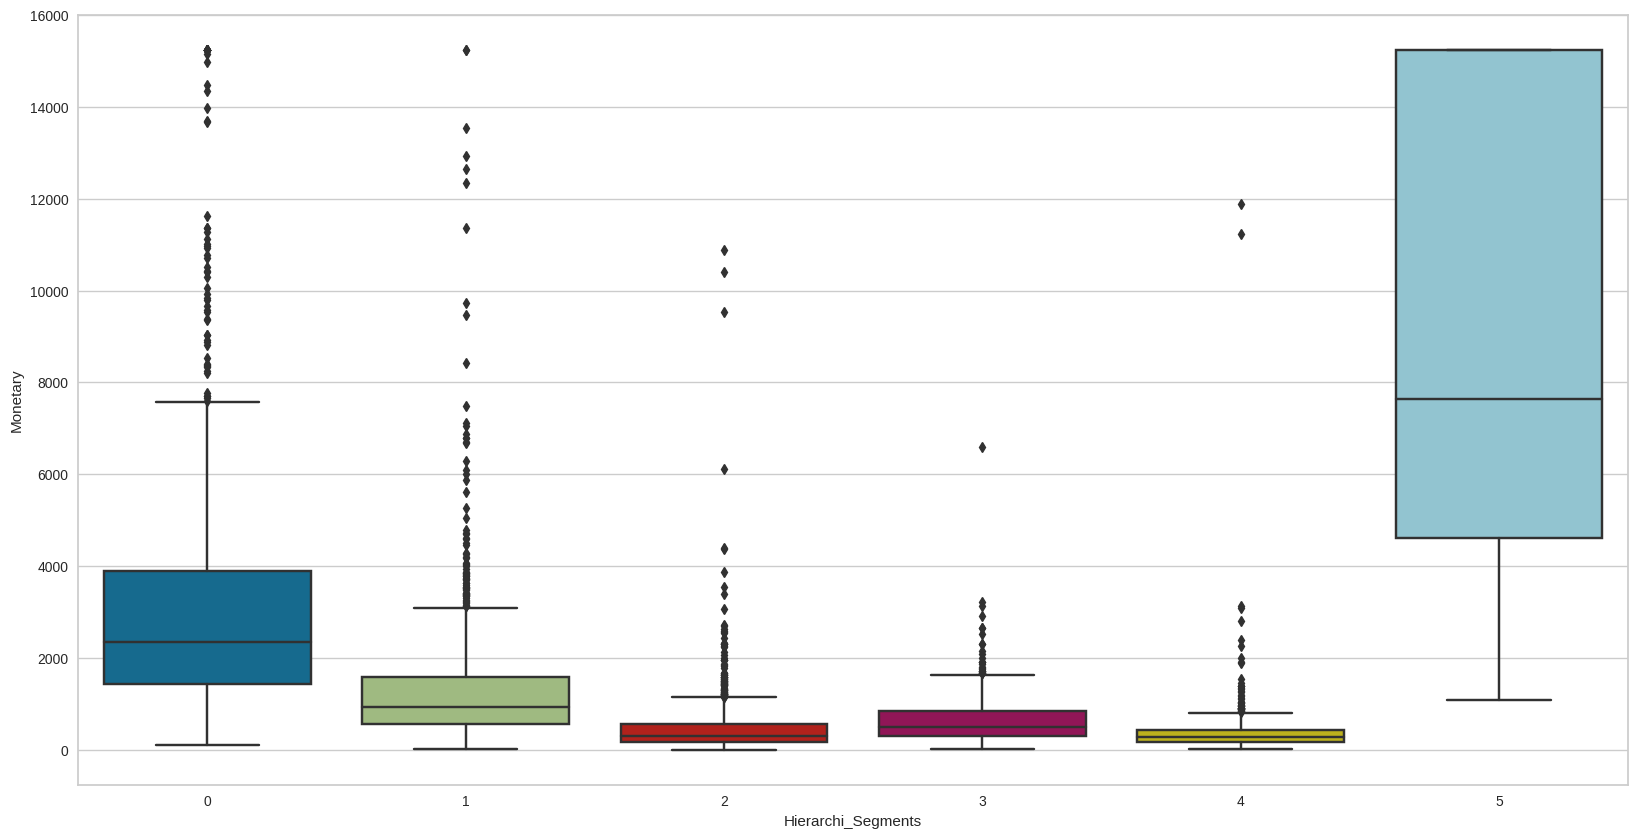

In [52]:
plt.figure(figsize=(20, 10))
sns.boxplot(x="Hierarchi_Segments", y="Monetary", data=rfm)
plt.show()